# Using autoencoder to predict a fine-grain dataset

### Required packages: Tensorflow, numpy, os, matplotlib, random

## Load the model trained in "quiver_autoencoder" and the 2i2o datasets, normalize the 2i2o datasets

In [190]:
import tensorflow
from tensorflow import keras

model = keras.models.load_model('/Users/lukedobrovic/Research/Data _ Code/quiver_model')

In [191]:
import numpy as np
import os

dir = os.getcwd()
data = np.load(str(dir + "/2i2o_4vect.npy"))
large_data= np.load(str(dir + "/2i2o_4vect_2_rescaled.npy"))

In [192]:
norm_c0 = np.mean(data[:,0])
data[:,0] = (data[:,0] - norm_c0) / norm_c0

norm_c1 = np.mean(data[:,1])
data[:,1] = (data[:,1] - norm_c1) / norm_c1

norm_c0 = np.mean(large_data[:,0])
large_data[:,0] = (large_data[:,0] - norm_c0) / norm_c0

norm_c1 = np.mean(large_data[:,1])
large_data[:,1] = (large_data[:,1] - norm_c1) / norm_c1

## Visualize the normalized 2i2o datasets with quiver plots

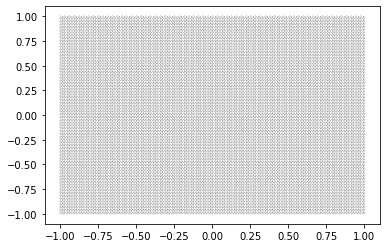

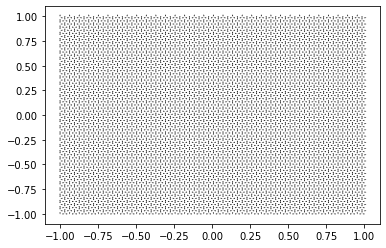

In [193]:
import matplotlib.pyplot as plt

plt.quiver(large_data[:,0], large_data[:,1], large_data[:,2], large_data[:,3])
plt.show()

plt.quiver(data[:,0], data[:,1], data[:,2], data[:,3])
plt.show()

## Verify the model is working properly by running it on the large 2i2o dataset and visualize the resultant mapping

1024/1024 [==============================] - 1s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - accuracy: 0.9866


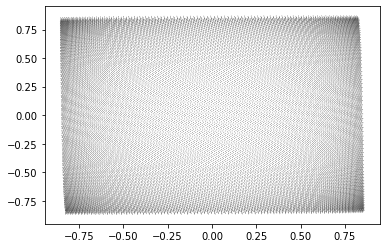

In [194]:
model.evaluate(large_data, large_data)

large_predictions = model.predict(large_data)

plt.quiver(large_predictions[:,0], large_predictions[:,1], large_predictions[:,2], large_predictions[:,3])
plt.show()

## Create a fine-grain dataset with random spin vectors and then normalize its x- and y-coordinates

In [195]:
import random

x_fine = np.linspace(0, 10, 101)
y_fine = np.linspace(0, 10, 101)

fine = []
for x in x_fine:
    for y in y_fine:
        entry = [x, y, random.uniform(-1, 1), random.uniform(-1, 1)]
        fine.append(entry)
        
fine = np.array(fine)
fine.shape
        
norm_c0 = np.mean(fine[:,0])
fine[:,0] = (fine[:,0] - norm_c0) / norm_c0

norm_c1 = np.mean(fine[:,1])
fine[:,1] = (fine[:,1] - norm_c1) / norm_c1
        
fine = np.array(fine)
fine.shape

(10201, 4)

## Visualize the fine-grain dataset with a quiver plot 

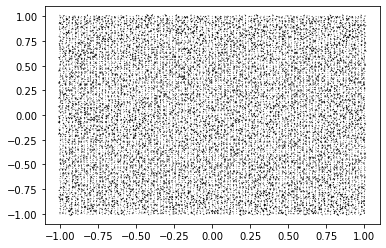

In [196]:
plt.quiver(fine[:,0], fine[:,1], fine[:,2], fine[:,3])
plt.show()

## Use the autoencoder model to make a mapping of the fine-grain dataset with random spin vectors, then visualize that mapping 

319/319 [==============================] - 1s 2ms/step - loss: 0.0449 - mean_squared_error: 0.0449 - accuracy: 0.8035


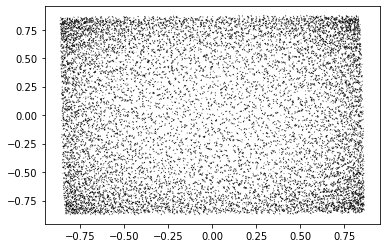

In [197]:
fine_predictions = model.predict(fine)

model.evaluate(fine, fine)

plt.quiver(fine_predictions[:,0], fine_predictions[:,1], fine_predictions[:,2], fine_predictions[:,3])
plt.show()